In [12]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
R.<x> = PolynomialRing(QQ)
Scplx= PowerSeriesRing(CC,'x',default_prec=300)

def division(dividend, divisor) : 
    quotient=(dividend._maxima_().divide(divisor).sage())[0] 
    remainder=(dividend._maxima_().divide(divisor).sage())[1] 
    return (quotient,remainder)

def ordP(n,p):
    fct=factor(n)
    lf=len(fct)
    for k in [0..lf-1]:
        prime=fct[k][0]
        if prime==p:
            answer=fct[k][1]
            return answer
    return 0

def polynomialExponentList(polynomial):
    pel=[]
    fp=polynomial.factor()
    lf=len(fp)
    for n in [0..lf-1]:
        part = fp[n]
        (base,exponent) = part
        pel=pel+[exponent]
    return pel

def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))
def xjNew(n,m):
    return xjNewStep(n-1,m)
def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))
def j(n,m):return xjNew(n,m)/x

def H(n,m): # definition 8.1 (13aug21)
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    power = 1/(m-2)
    frac=numerator/denominator
    return ((S(frac^power)).O(n+1)).polynomial()

def H4(n,m):
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    return ((S(numerator/denominator)).O(n+1)).polynomial()
#above omit the exponent 1/(m-2) from df 8.1
# to obtain df 8.2

def polynomialCoefficient(n,poly):
    return poly.list()[n]
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})

def deltaDiamond(n,m):
    return D(S(expand((H(n+2,m)^3)/J(n+2,m)))).truncate(n+1)

def deltaDiamondStrike(n,m): 
    # substitute 2^6*m^3*x for x in def 9.1; not
    # yet defined in draft  21h28jul21
    f=deltaDiamond(n,m)
    fl=f.list()
    df=f.degree()
    sm=sum(fl[k]*(x*m^3*2^6)^k for k in [0..df])
    dsm=sm.degree()
    sml=sm.list()
    notzero=[]
    for entry in sml:
        if (entry!=0):notzero=notzero+[entry]
    leadingterm=notzero[0]
    sm2=sum(fl[k]*(x*m^3*2^6)^k/leadingterm for k in [0..dsm])
    return sm2
        
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)

In [31]:
def deltaDiamondStrikeV2(n,m): 
    # substitute 2^6*m^3*x for x in def 9.1; not
    # yet defined in draft  21h28jul21
    f=deltaDiamond(n,m)
    fl=f.list()
    dg=f.degree()
    sm2=sum(fl[k]*(x*m^3*2^6)^k/(fl[1]*m^3*2^6) for k in [0..dg])
    return sm2

In [33]:
for m in [3..6]:
    print "-----------------------------------------------------------------------"
    f=deltaDiamond(5,m)
    fl=f.list()
    print m
    print deltaDiamond(5,m)
    print
    
 

-----------------------------------------------------------------------
3
805/1486016741376*x^5 - 23/80621568*x^4 + 7/82944*x^3 - 1/72*x^2 + x

-----------------------------------------------------------------------
4
201243/2147483648*x^5 - 17/16384*x^4 + 189/16384*x^3 - 1/8*x^2 + x

-----------------------------------------------------------------------
5
117919043/655360000000*x^5 - 130141/64000000*x^4 + 13551/640000*x^3 - 37/200*x^2 + x

-----------------------------------------------------------------------
6
725/2834352*x^5 - 227/78732*x^4 + 37/1296*x^3 - 2/9*x^2 + x



In [25]:
for m in [3..6]:
    print "-----------------------------------------------------------------------"
    print deltaDiamondStrike(5,m)

-----------------------------------------------------------------------
4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x
-----------------------------------------------------------------------
26377322496*x^5 - 71303168*x^4 + 193536*x^3 - 512*x^2 + x
-----------------------------------------------------------------------
736994018750*x^5 - 1041128000*x^4 + 1355100*x^3 - 1480*x^2 + x
-----------------------------------------------------------------------
9341553868800*x^5 - 7616856064*x^4 + 5455872*x^3 - 3072*x^2 + x


In [32]:
for m in [3..6]:
    print "-----------------------------------------------------------------------"
    print deltaDiamondStrikeV2(5,m)

-----------------------------------------------------------------------
4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x
-----------------------------------------------------------------------
26377322496*x^5 - 71303168*x^4 + 193536*x^3 - 512*x^2 + x
-----------------------------------------------------------------------
736994018750*x^5 - 1041128000*x^4 + 1355100*x^3 - 1480*x^2 + x
-----------------------------------------------------------------------
9341553868800*x^5 - 7616856064*x^4 + 5455872*x^3 - 3072*x^2 + x


In [19]:
poly=D(deltaDiamondStrike(100,3))
data=[]
ls=poly.list()
for n in [1..len(ls)-1]:
    data=data+[polynomialCoefficient(n,poly)-nieburTau(n)]
print data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
import time
import pickle
wfile = open('/Users/barrybrent/14aug21no2.txt','w') # diamond series
data=[]
totalstart=time.time()/60
for m in [3..303]:
    start=time.time()/60
    data=data+[[m,deltaDiamondStrike(100,m)]]
    finish=time.time()/60
    totaltime=finish-totalstart
    print (m,finish-start,totaltime)
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

(3, 0.050513945519924164, 0.050519831478595734)
(4, 0.03410801291465759, 0.08463406562805176)
(5, 0.06402218341827393, 0.1486590839922428)
(6, 0.0320545993745327, 0.18071603402495384)
(7, 0.0692221000790596, 0.2499396987259388)
(8, 0.05267840251326561, 0.30261991918087006)
(9, 0.07590040192008018, 0.3785218857228756)
(10, 0.04765751212835312, 0.4261810816824436)
(11, 0.07550403103232384, 0.5016869492828846)
(12, 0.06508143246173859, 0.5667713321745396)
(13, 0.07951203361153603, 0.6462910510599613)
(14, 0.052210818976163864, 0.6985035836696625)
(15, 0.09048289805650711, 0.7889901474118233)
(16, 0.06236696615815163, 0.851359635591507)
(17, 0.08777788281440735, 0.9391445331275463)
(18, 0.058834150433540344, 0.9979839846491814)
(19, 0.0830775648355484, 1.0810661315917969)
(20, 0.07530676573514938, 1.1563747189939022)
(21, 0.09548213705420494, 1.2518585175275803)
(22, 0.056574348360300064, 1.3084377497434616)
(23, 0.08589881658554077, 1.394340816885233)
(24, 0.08040496334433556, 1.474748015

(184, 0.10490056872367859, 46.05710628628731)
(185, 0.12694384902715683, 46.184051997959614)
(186, 0.10058851912617683, 46.28464266657829)
(187, 0.12668590247631073, 46.41133926808834)
(188, 0.10890836641192436, 46.52025460079312)
(189, 0.1340450830757618, 46.654301300644875)
(190, 0.09913261607289314, 46.753436017781496)
(191, 0.12259858101606369, 46.87603621557355)
(192, 0.10525673627853394, 46.98130375146866)
(193, 0.12129319831728935, 47.10259938240051)
(194, 0.08767919987440109, 47.19028116390109)
(195, 0.13905729725956917, 47.329345781356096)
(196, 0.11005515232682228, 47.43940566852689)
(197, 0.12347158789634705, 47.56288210302591)
(198, 0.09880688413977623, 47.66169058531523)
(199, 0.12400035187602043, 47.785693150013685)
(200, 0.10878805071115494, 47.89449344947934)
(201, 0.1313996985554695, 48.0258947648108)
(202, 0.08990201354026794, 48.1157986484468)
(203, 0.12701736390590668, 48.24281878396869)
(204, 0.1151462197303772, 48.357967384159565)
(205, 0.12799423560500145, 48.485

In [23]:
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no4.txt','w') 
data=[]
for k in [0..50]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [24]:
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no5.txt','w') 
data=[]
for k in [51..101]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [25]:
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no5.txt','w') 
data=[]
for k in [101..150]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [26]:
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no6.txt','w') 
data=[]
for k in [151..190]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [27]:
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no7.txt','w') 
data=[]
for k in [191..220]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [30]:
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no9.txt','w') 
data=[]
for k in [221..250]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [31]:
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no10.txt','w') 
data=[]
for k in [251..280]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [33]:
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no12.txt','w') 
data=[]
for k in [281..len(s)-1]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [21]:
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
data=[]
for k in [0..len(s)-1]:
    m = s[k][0]
    poly=D(s[k][1])
    data=data+[[k,poly.degree()]]
print(data) # correctness check: all of the series have the right degree.

[[0, 100], [1, 100], [2, 100], [3, 100], [4, 100], [5, 100], [6, 100], [7, 100], [8, 100], [9, 100], [10, 100], [11, 100], [12, 100], [13, 100], [14, 100], [15, 100], [16, 100], [17, 100], [18, 100], [19, 100], [20, 100], [21, 100], [22, 100], [23, 100], [24, 100], [25, 100], [26, 100], [27, 100], [28, 100], [29, 100], [30, 100], [31, 100], [32, 100], [33, 100], [34, 100], [35, 100], [36, 100], [37, 100], [38, 100], [39, 100], [40, 100], [41, 100], [42, 100], [43, 100], [44, 100], [45, 100], [46, 100], [47, 100], [48, 100], [49, 100], [50, 100], [51, 100], [52, 100], [53, 100], [54, 100], [55, 100], [56, 100], [57, 100], [58, 100], [59, 100], [60, 100], [61, 100], [62, 100], [63, 100], [64, 100], [65, 100], [66, 100], [67, 100], [68, 100], [69, 100], [70, 100], [71, 100], [72, 100], [73, 100], [74, 100], [75, 100], [76, 100], [77, 100], [78, 100], [79, 100], [80, 100], [81, 100], [82, 100], [83, 100], [84, 100], [85, 100], [86, 100], [87, 100], [88, 100], [89, 100], [90, 100], [91, 100

In [22]:
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/14aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/14aug21no3.txt','w') # diamond polynomials
for qpower in [0..100]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=s[k][1] 
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    finish = time.time()
    print([qpower,finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[0, 0.8171029090881348]
[1, 0.7704629898071289]
[2, 0.808366060256958]
[3, 0.7824089527130127]
[4, 0.8223848342895508]
[5, 0.7713019847869873]
[6, 0.8295631408691406]
[7, 0.7841360569000244]
[8, 0.8321189880371094]
[9, 0.7900638580322266]
[10, 0.8367419242858887]
[11, 0.8321640491485596]
[12, 0.7927119731903076]
[13, 0.8386499881744385]
[14, 0.796396017074585]
[15, 0.8355998992919922]
[16, 0.8068981170654297]
[17, 0.8555002212524414]
[18, 0.8112518787384033]
[19, 0.8483970165252686]
[20, 0.8204948902130127]
[21, 0.8807289600372314]
[22, 0.845465898513794]
[23, 0.8782920837402344]
[24, 0.8275818824768066]
[25, 0.8901550769805908]
[26, 0.8482818603515625]
[27, 0.8899130821228027]
[28, 0.8490359783172607]
[29, 0.8995389938354492]
[30, 0.8598349094390869]
[31, 0.9208548069000244]
[32, 0.8695001602172852]
[33, 0.9033181667327881]
[34, 0.8707818984985352]
[35, 0.9084219932556152]
[36, 0.8789381980895996]
[37, 0.936845064163208]
[38, 0.886786937713623]
[39, 0.946526050567627]
[40, 0.896342992

In [35]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r')# diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no14.txt','w') 
data=[]
for k in [0..50]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [38]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no16.txt','w') 
data=[]
for k in [51..70]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [40]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no18.txt','w') 
data=[]
for k in [71..80]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [41]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no19.txt','w') 
data=[]
for k in [81..90]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [42]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run14aug21no20.txt','w') 
data=[]
for k in [91..100]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [2]:
print deltaDiamond(5,3)

805/1486016741376*x^5 - 23/80621568*x^4 + 7/82944*x^3 - 1/72*x^2 + x


In [2]:
# experimental controls
import time
import pickle
wfile = open('/Users/barrybrent/14aug21no31.txt','w') # diamond series
data=[]
totalstart=time.time()/60
for m in [3..63]:
    start=time.time()/60
    data=data+[[m,deltaDiamond(20,m)]]
    finish=time.time()/60
    totaltime=finish-totalstart
    print (m,finish-start,totaltime)
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

(3, 0.004779435694217682, 0.0047906674444675446)
(4, 0.00210760161280632, 0.006900999695062637)
(5, 0.004590582102537155, 0.011493667960166931)
(6, 0.003291316330432892, 0.014795351773500443)
(7, 0.005043681710958481, 0.019840415567159653)
(8, 0.00264643132686615, 0.0224904827773571)
(9, 0.005848634988069534, 0.028343331068754196)
(10, 0.004244398325681686, 0.032595232129096985)
(11, 0.005719602108001709, 0.03831908479332924)
(12, 0.00456412136554718, 0.042885102331638336)
(13, 0.005969036370515823, 0.04885600134730339)
(14, 0.004489883780479431, 0.053347401320934296)
(15, 0.00697866827249527, 0.06032758206129074)
(16, 0.002960681915283203, 0.06328978016972542)
(17, 0.006408464163541794, 0.06969983130693436)
(18, 0.005019001662731171, 0.07472558319568634)
(19, 0.006279252469539642, 0.08100990206003189)
(20, 0.004993397742509842, 0.08600711449980736)
(21, 0.007334761321544647, 0.09334388002753258)
(22, 0.004944801330566406, 0.09829055145382881)
(23, 0.006444230675697327, 0.1047362647950

In [3]:
# interpolating polynomials: experimental controls
import pickle
rfile = open('/Users/barrybrent/14aug21no31.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/14aug21no32.txt','w') # diamond polynomials
for qpower in [0..20]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=s[k][1] 
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    finish = time.time()
    print([qpower,finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[0, 0.48992013931274414]
[1, 0.03904104232788086]
[2, 0.04231715202331543]
[3, 0.04591703414916992]
[4, 0.047749996185302734]
[5, 0.09398794174194336]
[6, 0.05189013481140137]
[7, 0.054080963134765625]
[8, 0.05509018898010254]
[9, 0.057189226150512695]
[10, 0.058619022369384766]
[11, 0.061302900314331055]
[12, 0.06644201278686523]
[13, 0.06732606887817383]
[14, 0.0708310604095459]
[15, 0.07049298286437988]
[16, 0.0728142261505127]
[17, 0.07583379745483398]
[18, 0.07735204696655273]
[19, 0.08139610290527344]
[20, 0.0829930305480957]


In [14]:
import pickle
rsfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)

import pickle
rtfile = open('/Users/barrybrent/14aug21no32.txt','r') # diamond series
rt=pickle.load(rtfile)
rtfile.close()
t=stripQuotationMarks(rt)

for k in [1..len(t)-1]:
    ns=s[k][0]
    nt=t[k][0]
    polys=D(s[k][1])
    polyt=D(t[k][1])
    ds=polys.degree()
    dt=polyt.degree()
    print (ns,nt,ds,dt)
    # polyt's are not interpolated.

(1, 1, 0, 0)
(2, 2, 3, 60)
(3, 3, 6, 60)
(4, 4, 9, 60)
(5, 5, 12, 60)
(6, 6, 15, 60)
(7, 7, 18, 60)
(8, 8, 21, 60)
(9, 9, 24, 60)
(10, 10, 27, 60)
(11, 11, 30, 60)
(12, 12, 33, 60)
(13, 13, 36, 60)
(14, 14, 39, 60)
(15, 15, 42, 60)
(16, 16, 45, 60)
(17, 17, 48, 60)
(18, 18, 51, 60)
(19, 19, 54, 60)
(20, 20, 57, 60)


In [7]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r')# diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
nfdata=[]
for k in [1..4]:
    n=s[k][0]
    poly=D(s[k][1])
    nf=numericalfactor(poly)
    nfdata=nfdata+[nf]
    print "-----------------------------------------------------------------------"
    print
    print (n,nf)
    print
    print poly.factor()
print nfdata

-----------------------------------------------------------------------

(1, 1)

1
-----------------------------------------------------------------------

(2, -24)

(-24) * x * (x^2 - 2*x - 8/3)
-----------------------------------------------------------------------

(3, 300)

(300) * (x - 2) * x^2 * (x^3 - 2*x^2 - 44/15*x - 8/75)
-----------------------------------------------------------------------

(4, -2624)

(-2624) * (x - 2) * x^3 * (x^5 - 162/41*x^4 + 3524/1107*x^3 + 2008/1107*x^2 - 8576/1107*x - 2176/1107)
[1, -24, 300, -2624]


In [9]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rfile.close()
s=stripQuotationMarks(rs)
nfdata=[]
for k in [1..len(s)-1]:
    n=s[k][0]
    poly=D(s[k][1])
    nf=numericalfactor(poly)
    nfdata=nfdata+[nf]
print nfdata # A100130

[1, -24, 300, -2624, 18126, -105504, 538296, -2471424, 10400997, -40674128, 149343012, -519045888, 1718732998, -5451292992, 16633756008, -49010118656, 139877936370, -387749049720, 1046413709980, -2754808758144, 7087483527072, -17848133716832, 44056043512488, -106727749011456, 254038914924791, -594727796789904, 1370672890379256, -3112527757630976, 6969326980985910, -15398305232347584, 33592387385401312, -72402560110657536, 154259370820898352, -325054005510289072, 677753303673755664, -1398915135310801728, 2859520058421923246, -5790867529442344608, 11622478180198598664, -23126217803830162432, 45635040211476100122, -89332443520260830976, 173523544573593276932, -334549647523673157888, 640359531494616346182, -1217168171378980569024, 2297933848083202067664, -4309991844062803968000, 8032568516459357451913, -14878330606740791629608, 27393933468602781510552, -50145258812293875625344, 91275027603195425768478, -165229924501787179917120, 297512348771305933459192, -532921047956407202009088, 94977697

In [18]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
data=[]
for k in [3..len(s)-1]:
    n=s[k][0]
    poly=s[k][1]
    divideby=(x-2)*x^(n-1)
    g=division(poly,divideby)
    explist=polynomialExponentList(D(g[0]))
    # explist = 1 => g[0] is irreducible.
    data=data+[explist]
print data

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


In [19]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
data=[]
for k in [3..len(s)-1]:
    n=s[k][0]
    poly=s[k][1]
    divideby=(x-2)^2
    g=division(poly,divideby)
    if g[1]==0:data=data+[n]
print data

[]


In [20]:
import pickle
rfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
data=[]
for k in [3..len(s)-1]:
    n=s[k][0]
    poly=s[k][1]
    divideby=x^n
    g=division(poly,divideby)
    if g[1]==0:data=data+[n]
print data

[]


99


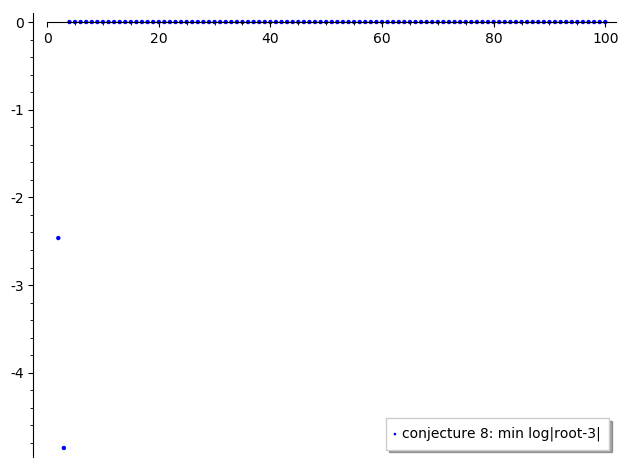

[[2, log(abs(1/3*sqrt(33) - 2))], [3, log(abs(abs(128/675*I*sqrt(31) + 896/675)^(1/3)*cos(1/3*arctan(1/7*sqrt(31))) + I*abs(128/675*I*sqrt(31) + 896/675)^(1/3)*sin(1/3*arctan(1/7*sqrt(31))) + 64/45*cos(1/3*arctan(1/7*sqrt(31)))/abs(128/675*I*sqrt(31) + 896/675)^(1/3) - 64/45*I*sin(1/3*arctan(1/7*sqrt(31)))/abs(128/675*I*sqrt(31) + 896/675)^(1/3) - 7/3))], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 0], [59, 0], [60, 0], [61, 0], [62, 0], [63, 0], [64, 0], [65, 0], [66, 0], [67, 0], [68, 0], [69, 0], [70, 0], [71, 0], [72, 0], [73, 0], [74, 0], [75, 0], 

In [2]:
import pickle
import math
rsfile = open('/Users/barrybrent/14aug21no3.txt','r') # diamond polynomials
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)


lengths=[]
points=[]
for k in [2..len(s)-1]:
    distances=[]
    n=s[k][0]
    poly=s[k][1]
    pr=poly.roots()
    lpr=len(pr)
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        re=root[0]
        im=root[1]
        tfr=math.isnan(re)
        tfi=math.isnan(im)
        if tfr==False:
            if tfi==False:
                zero=re+I*im
                distance=abs(zero-3)
        distances=distances+[distance]
    minimum=min(distances)
    points=points+[[n,log(minimum)]]
print len(points)
p=list_plot(points,color='blue',legend_label='conjecture 8: min log|root-3|')
p.set_legend_options(loc='best')
p.save('cn8_3dist.pdf')
show(p)
print points

In [3]:
import pickle
rsfile = open('/Users/barrybrent/14aug21no3.txt','r')
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)
print len(s)

101


-----------------------------------------------------------------------------------
('polynomial #', 100)


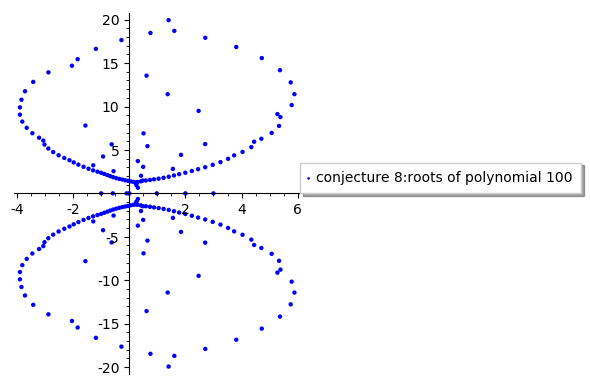

In [6]:
import pickle
rsfile = open('/Users/barrybrent/14aug21no3.txt','r')
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [100..100]:
    points=[]
    n=s[k][0]
    print "-----------------------------------------------------------------------------------"
    print("polynomial #",n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        points=points+[root]
        rootcount=rootcount+mult
    p=list_plot(points,color='blue',legend_label='conjecture 8:roots of polynomial 100')
    p.set_legend_options(loc=(1,.5))
    p.save("cn8roots_poly100.pdf")
show(p)

-----------------------------------------------------------------------------------
('polynomial #', 50)


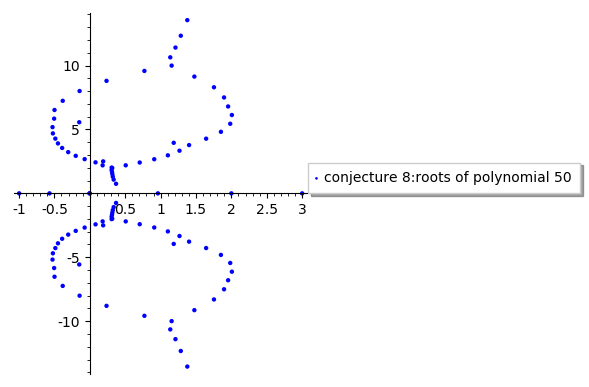

In [7]:
import pickle
rsfile = open('/Users/barrybrent/14aug21no3.txt','r')
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [50..50]:
    points=[]
    n=s[k][0]
    print "-----------------------------------------------------------------------------------"
    print("polynomial #",n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        points=points+[root]
        rootcount=rootcount+mult
    p=list_plot(points,color='blue',legend_label='conjecture 8:roots of polynomial 50')
    p.set_legend_options(loc=(1,.5))
    p.save("cn8roots_poly50.pdf")
show(p)
# plot disagrees with mathematica, but the polynomials do agree. (See table below.)

-----------------------------------------------------------------------------------
('polynomial #', 10)

-40674128*x^27 + 69155206688/105*x^26 - 44455564695895424/6251175*x^25 + 2462810339219456/46305*x^24 - 17315318729094781952/56260575*x^23 + 8811800802511640576/6251175*x^22 - 58506210348364488704/11252115*x^21 + 13901471428628905984/893025*x^20 - 233776316308138074112/6251175*x^19 + 444050821149770924032/6251175*x^18 - 5683928069382315507712/56260575*x^17 + 196706196326517833728/2083725*x^16 - 1381549052834293219328/56260575*x^15 - 76620544058603339776/893025*x^14 + 2810971858741395193856/18753525*x^13 - 736678324387585196032/6251175*x^12 + 47124177608422457344/2083725*x^11 + 155460735995471724544/6251175*x^10 - 53912674299457568768/3750705*x^9



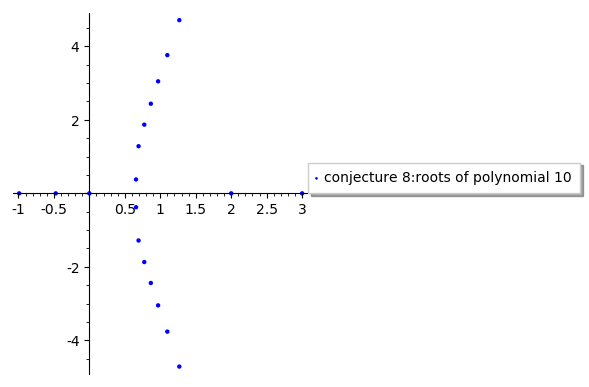

In [8]:
import pickle
rsfile = open('/Users/barrybrent/14aug21no3.txt','r')
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [10..10]:
    points=[]
    n=s[k][0]
    print "-----------------------------------------------------------------------------------"
    print("polynomial #",n)
    poly=R(s[k][1])
    print
    print poly
    print
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        points=points+[root]
        rootcount=rootcount+mult
    p=list_plot(points,color='blue',legend_label='conjecture 8:roots of polynomial 10')
    p.set_legend_options(loc=(1,.5))
    p.save("cn8roots_poly10.pdf")
show(p)
# agrees with mathematica

-----------------------------------------------------------------------------------
('polynomial #', 50)

-14878330606740791629608*x^147 + 241649693320860002747817869504770084499344/275912081930733325*x^146 - 15433863906340533671950390961558109169273316252558142280000770322925034313560321472/310532910439835070347123219092415080988788672426926444375*x^145 + 1051514386431420635420054002794629113350553626795653712621268837206246471796420238103894016/562646699408487080101056433246076915933731946575031766852571875*x^144 - 17067224536816256732359558039300276749125618659273889408796841255783224591300168501327931105219653211340260352/264629931978791316271009766175800768652470873667988361646936371200440811325671875*x^143 + 62134979687920251212871295287651416941054675882813224118726680340720951919322951626560553060063813278313452460032/33960841270611552254779586659227765310400428787391839744690167637389904120127890625*x^142 - 1602846591172182964824675934823590553127739576521638159921310478913506

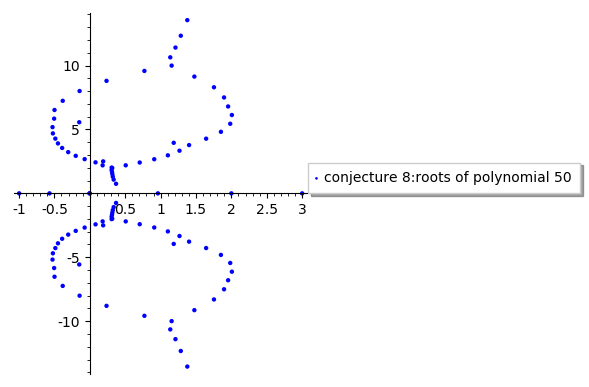

In [9]:
import pickle
rsfile = open('/Users/barrybrent/14aug21no3.txt','r')
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [50..50]:
    points=[]
    n=s[k][0]
    print "-----------------------------------------------------------------------------------"
    print("polynomial #",n)
    poly=R(s[k][1])
    print
    print poly
    print
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        points=points+[root]
        rootcount=rootcount+mult
    p=list_plot(points,color='blue',legend_label='conjecture 8:roots of polynomial 50')
    p.set_legend_options(loc=(1,.5))
    p.save("cn8roots_poly50no2.pdf")
show(p)
# the leading term of this polynomial agrees with mathematica's, but the plots 
#  disagree.

12


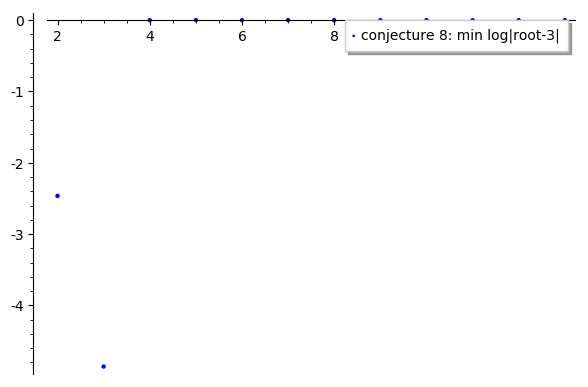

[[2, log(abs(1/3*sqrt(33) - 2))], [3, log(abs(abs(128/675*I*sqrt(31) + 896/675)^(1/3)*cos(1/3*arctan(1/7*sqrt(31))) + I*abs(128/675*I*sqrt(31) + 896/675)^(1/3)*sin(1/3*arctan(1/7*sqrt(31))) + 64/45*cos(1/3*arctan(1/7*sqrt(31)))/abs(128/675*I*sqrt(31) + 896/675)^(1/3) - 64/45*I*sin(1/3*arctan(1/7*sqrt(31)))/abs(128/675*I*sqrt(31) + 896/675)^(1/3) - 7/3))], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0]]


In [10]:
import pickle
import math
rsfile = open('/Users/barrybrent/14aug21no3.txt','r')
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)


lengths=[]
points=[]
for k in [2..13]:
    distances=[]
    n=s[k][0]
    poly=s[k][1]
    pr=poly.roots()
    lpr=len(pr)
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        re=root[0]
        im=root[1]
        tfr=math.isnan(re)
        tfi=math.isnan(im)
        if tfr==False:
            if tfi==False:
                zero=re+I*im
                distance=abs(zero-3)
        distances=distances+[distance]
    minimum=min(distances)
    points=points+[[n,log(minimum)]]
print len(points)
p=list_plot(points,color='blue',legend_label='conjecture 8: min log|root-3|')
p.set_legend_options(loc='best')
p.save('cn8_3distNo2.pdf')
show(p)
print points